In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    res = np.sinh(1/(1+x**2))
    return res

def rdiff(x, h):
    res = (f(x+h) - f(x))/h
    return res

def ldiff(x, h):
    res = (f(x) - f(x-h))/h
    return res

def cdiff(x, h):
    res = (f(x+h) - f(x-h))/(2*h)
    return res

def redge_diff(x, h):
    res = (3*f(x) - 4*f(x-h) + f(x-2*h))/(2*h)
    return res

def ledge_diff(x, h):
    res = (-3*f(x) + 4*f(x+h) - f(x+2*h))/(2*h)
    return res

def rvalues_builder(a, b, h, xnet, rf1values, steps):
    i = 0
    while (i < steps - 1):
        rf1values.append(rdiff(xnet[i], h))
        i += 1
    rf1values.append(ldiff(xnet[i], h))

def cvalues_builder(a, b, h, xnet, cf1values, steps):
    cf1values.append(redge_diff(xnet[0], h))
    i = 1
    while (i < steps - 1):
        cf1values.append(cdiff(xnet[i], h))
        i += 1
    cf1values.append(ledge_diff(xnet[i], h))

def c2diff2(x, h):
    res = (f(x-h) - 2*f(x) + f(x+h))/h**2
    return res

def ledge_2diff2(x, h):
    res = (2*f(x) - 5*f(x+h) + 4*f(x+2*h)-f(x+3*h))/h**2
    return res

def redge_2diff2(x, h):
    res = (-2*f(x-3*h) + 5*f(x-2*h) - 4*f(x-h) + f(x))/h**2
    return res

def c2values2_builder(a, b, h, xnet, cf2values2, steps):
    cf2values2.append(ledge_2diff2(xnet[0], h))
    i = 1
    while (i < steps - 1):
        cf2values2.append(c2diff2(xnet[i], h))
        i += 1
    cf2values2.append(redge_2diff2(xnet[i], h))

def ledge_2diff4(x, h):
    res = (15/4*f(x) - 77/6*f(x+h) + 107/6*f(x+2*h) - 13*f(x+3*h) + 61/12*f(x+4*h) - 5/6*f(x+5*h))/h**2
    return res

def redge_2diff4(x, h):
    res = (-15/4*f(x-5*h) + 77/6*f(x-4*h) - 107/6*f(x-3*h) + 13*f(x-2*h) - 61/12*f(x-h) + 5/6*f(x))/h**2
    return res

def c2diff4(x, h):
    res = (-1/12*f(x-2*h) + 4/3*f(x-h) - 5/2*f(x) + 4/3*f(x+h) - 1/12*f(x+2*h))/h**2
    return res

def c2values4_builder(a, b, h, xnet, cf2values4, steps):
    temp = a
    cf2values4.append(ledge_2diff4(xnet[0], h))
    cf2values4.append(ledge_2diff4(xnet[1], h))
    i = 2
    while (i < steps - 2):
        cf2values4.append(c2diff4(xnet[i], h))
        i += 1
        temp += h
    cf2values4.append(redge_2diff4(xnet[steps - 2], h))
    cf2values4.append(redge_2diff4(xnet[steps - 1], h))

a = -3.0
b = 3.0
h = 0.1

xnet = []
steps = 0
temp = a
while (temp <= b):
    steps += 1
    xnet.append(temp)
    temp += h
rf1values = []
cf1values = []
rvalues_builder(a, b, h, xnet, rf1values, steps)
cvalues_builder(a, b, h, xnet, cf1values, steps)

cf2values2 = []
c2values2_builder(a, b, h, xnet, cf2values2, steps)

cf2values4 = []
c2values4_builder(a, b, h, xnet, cf2values4, steps)

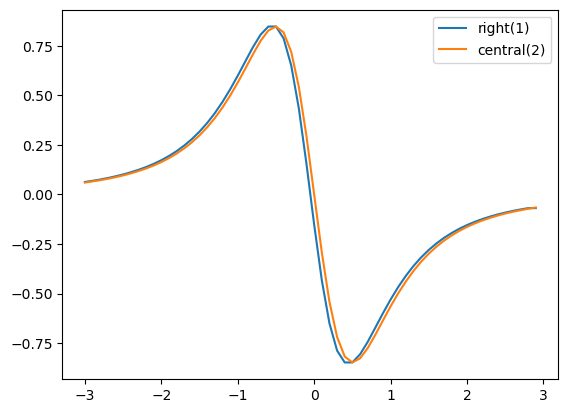

In [2]:
plt.plot(xnet, rf1values, label = "right(1)")
plt.plot(xnet, cf1values, label = "central(2)")
plt.legend()
plt.show()

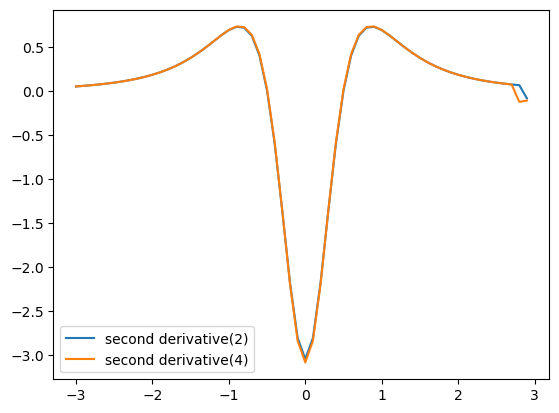

In [3]:
plt.plot(xnet, cf2values2, label = "second derivative(2)")
plt.plot(xnet, cf2values4, label = "second derivative(4)")
plt.legend()
plt.show()